In [108]:
# let's import some libraries, shall we?

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import re

In [2]:
# fetching the csv's into dataframes

df_clients = pd.read_csv("clients.csv")
df_sales = pd.read_csv("ventes.csv")
df_products = pd.read_csv("produits.csv")

In [13]:
# now it's time to clean them a bit

# let's start by removing duplicates
df_clients = df_clients.drop_duplicates()
df_sales = df_sales.drop_duplicates()
df_products = df_products.drop_duplicates()

# print(df_clients.isnull().sum()
# .sort_values(ascending = False) / len(df_clients))
# print(df_sales.isnull().sum()
# .sort_values(ascending = False) / len(df_sales))
# print(df_products.isnull().sum()
# .sort_values(ascending = False) / len(df_products))

# here was checked whether data was missing or not
# and it confirmed there was no missing data detected

In [20]:
# while there still are negative prices
while int(df_products[['price']].min()) < 0:
    incorrect_price = df_products['price'].argmin()
    df_products = df_products.drop(
        incorrect_price
    ).reset_index(drop = True) # drop it

In [42]:
# importing pre-done stats functions
###
# REMINDER: use list() to convert Series-types
# into, well, lists to use those functions with


def avg(v): # average
    sum = 0
    for i in (v):
        sum += i
    return(sum / len(v))


def var(v): # variance
    diffs = []
    for i in (v): # = SUM of each ((v(i) - avg(v))^2)
        diffs.append((i - avg(v)) ** 2)
    return(avg(diffs)) # = average of above formula


def stdev(v): # spread
    return(var(v) ** 0.5) # square root = ^0.5


def med(v): # median
    v.sort() # better sort the list to find which item is in the middle
    if len(v) % 2 == 1 :
        # if v is of odd length
        median = v[int((len(v) - 1) / 2)] # the item in the middle
    else :
        # if v is of even length
        middle = [v[int((len(v) / 2) - 1)], v[int(len(v) / 2)]]
        median = avg(middle) # the average of the two middle-most items
    return(median)

In [35]:
# gini index


def gini(v):
    v.sort() # getting the list items in order
    n = len(v)      # count
    q = 2 / n       # coefficient
    k = (n + 1) / n # constant
    sum = 0
    wsum = 0        # weighted sum
    for i in range (0, n):
        sum += v[i]
        wsum += (i + 1) * v[i]
    return(q * wsum / sum - k)

In [49]:
# lorenz curve


def lorenz(v):
    v.sort() # getting the list items in order
    sum = 0
    for i in (v):
        sum += i
    csum = 0 # cumulative sum
    curve = [0] # the origin 0 value
    for i in (v):
        csum += i
        curve.append(csum / sum)
    return(curve)

Central tendency and dispersion indicators of product prices:

	Mean     : 21.863597078514857
	Variance : 890.7385487165337
	St. Dev. : 29.845243318099012
	Median   : 13.075


<AxesSubplot:>

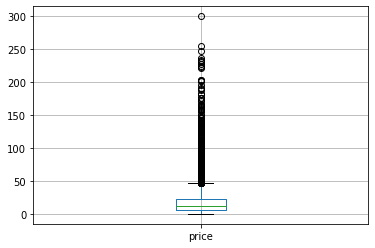

In [87]:
print("Central tendency and dispersion indicators of product prices:\n")
print("\tMean     : " + str(avg(list(df_products['price']))))
print("\tVariance : " + str(var(list(df_products['price']))))
print("\tSt. Dev. : " + str(stdev(list(df_products['price']))))
print("\tMedian   : " + str(med(list(df_products['price']))))

df_products[['price']].boxplot()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_6444\3175903485.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


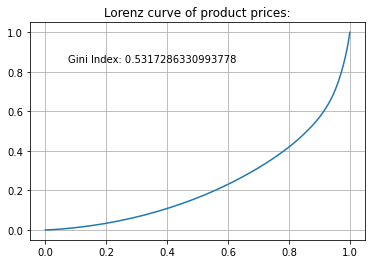

In [149]:
# plotting the lorenz curve of price
pricecurve = lorenz(list(df_products['price']))
pricegini = gini(list(df_products['price']))
textgini = "Gini Index: " + str(pricegini)

# plot
X = np.linspace(0.0, 1.0, len(pricecurve))
Y = pricecurve

fig, ax = plt.subplots()
ax.plot(X, Y)
ax.grid()
ax.text(0.35, 0.85, textgini, ha = 'center')

plt.title("Lorenz curve of product prices:")

fig.show()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_6444\3577406059.py:59: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


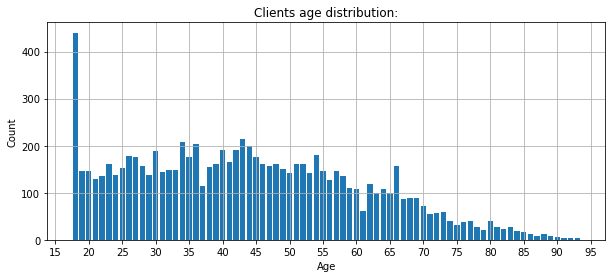

In [148]:
# barplotting the sales per ages

# init
ages = []
agedist = []

# gathering ages of everyone
# (I'm going to cheat a bit since all sales happened in 2021-2022)
for i in df_clients.index:
    ages.append(2022 - int(df_clients.loc[i, "birth"]))

ages.sort() # the first item is now the youngest age
minage = ages[0]
ages.reverse() # now it's the oldest age
maxage = ages[0]
ages.reverse() # to make it usable in the next for loop


curi = 0 # item pointer
curage = minage # age pointer
while curage <= maxage: # repeat the following until reaching max age
    count = 0
    if ages[curi] < curage:
        curi += 1 # advance item pointer if pointed item's age < current age
    if ages[curi] == curage:
        while ages[curi] == curage: # if pointed item's age is current age,
            count += 1 # add one count for as many as there is of this age
            curi += 1
            if curi >= len(ages): # extra security
                break
    if curi >= len(ages): #if the list is over
        agedist.append(count) # add the count to the list
        break
    elif ages[curi] > curage: # if the count is over
        agedist.append(count) # add the count to the list
        curage += 1

agedist = np.array(agedist) # to avoid type conflict


# plot
X = np.arange(minage, maxage + 1, 1)
Y = agedist[(X - minage)]

fig, ax = plt.subplots()

ax.bar(X, Y)
ax.grid()
ax.set_xlabel("Age")
ax.set_ylabel("Count")

ax.set_xticks(np.arange(int(minage / 5) * 5,
                        (int(maxage / 5) + 1) * 5 + 1, 5))

plt.title("Clients age distribution:")

fig.set_figwidth(10) # all of this is for readability

fig.show()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_6444\2328520579.py:80: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


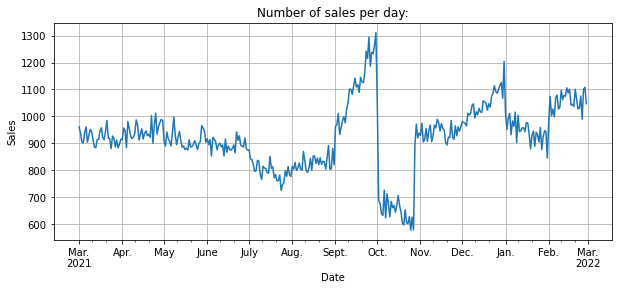

In [147]:
# plotting sales per days

df_sales_sorted = df_sales.sort_values('date')

# init
# the dates on the dataframe range from March 2021 to February 2022
salesyear = []
#         Mar Apr May Jun Jul Aug Sep Oct Nov Dec Jan Feb
months = [31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28]
for i in range (12):
    salesyear.append(np.zeros(months[i]))

m = ["03", "04", "05", "06", "07", "08",
     "09", "10", "11", "12", "01", "02"]
d = ["01", "02", "03", "04", "05", "06", "07",
     "08", "09", "10", "11", "12", "13", "14",
     "15", "16", "17", "18", "19", "20", "21",
     "22", "23", "24", "25", "26", "27", "28",
     "29", "30", "31"]

allsales = []

for i in df_sales_sorted.index:
    allsales.append(str(df_sales_sorted.loc[i, "date"]))

curi = 0 # item pointer
for month in range (len(m)):
    year = "2021"
    if month >= 10: # January and February of the next year
        year = "2022"
    for day in range (len(salesyear[month])):
        while re.search("\A" + year + "-" + m[month] + "-" + d[day],
                        allsales[curi]):
            salesyear[month][day] += 1 # one more sale that day
            curi += 1

            
salesyearlong = [] # putting everything in one long list

for i in salesyear:
    for j in i:
        salesyearlong.append(j)
        
        
salesyearlong = np.array(salesyearlong) # to avoid type conflict

        
# plot
X = np.arange(0, len(salesyearlong), 1)
Y = salesyearlong[X]

# month labelling
cmonths = [0, 31, 61, 92, 122, 153, 184, 214, 245, 275, 306, 337]
ctens = []
for i in cmonths:
    ctens.append(i) # 1st of the month
    ctens.append(i + 9) # 10th of the month
    ctens.append(i + 19) # 20th of the month
cmonths.append(365) # adding the last month mark
monthwords = ["Mar.\n2021", "Apr.", "May", "June",
              "July", "Aug.", "Sept.", "Oct.",
              "Nov.", "Dec.", "Jan.", "Feb.",
              "Mar.\n2022"]

fig, ax = plt.subplots()

ax.plot(X, Y)
ax.grid()
ax.set_xlabel("Date")
ax.set_ylabel("Sales")
ax.xaxis.set_major_locator(ticker.FixedLocator(cmonths))
ax.xaxis.set_minor_locator(ticker.FixedLocator(ctens))
ax.xaxis.set_major_formatter(
    ticker.FixedFormatter(monthwords))

plt.title("Number of sales per day:")

fig.set_figwidth(10) # this is for readability

fig.show()

In [ ]:
# preparing to answer more the specific questions

In [133]:
# merging dataframes
# (linking each client info to each of their purchases)

df_linked = pd.merge(df_sales, df_clients, how = 'outer', on = 'client_id')
df_linked = pd.merge(df_linked, df_products, how = 'outer', on = 'id_prod')

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_6444\2352728101.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


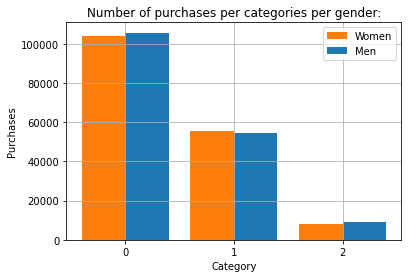

In [156]:
# plotting correlation between
# clients sex and purchased products category

# checking how many categories there are
mincateg = int(df_linked[['categ']].min())
maxcateg = int(df_linked[['categ']].max())

# init
count = np.zeros((2, maxcateg - mincateg + 1))

# counting
for i in df_linked.index:
    sex = -1
    if str(df_linked.loc[i, "sex"]) == "f":
        sex = 0
    elif str(df_linked.loc[i, "sex"]) == "m":
        sex = 1
    # if neither sex or categ is null, add 1 to the appropriate cell
    if sex != -1 and pd.notnull(df_linked.loc[i, "categ"]):
        categ = int(df_linked.loc[i, "categ"]) - mincateg
        count[sex][categ] += 1


# plot
X = np.arange(mincateg, maxcateg + 1, 1)
F = count[0][X]
M = count[1][X]

fig, ax = plt.subplots()
  
ax.bar(X - 0.2, F, 0.4, label = 'Women', color = 'C1')
ax.bar(X + 0.2, M, 0.4, label = 'Men', color = 'C0')
ax.grid()
ax.set_xticks(X)
ax.set_xlabel("Category")
ax.set_ylabel("Purchases")
ax.legend()

plt.title("Number of purchases per categories per gender:")

fig.show()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_6444\3487756404.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


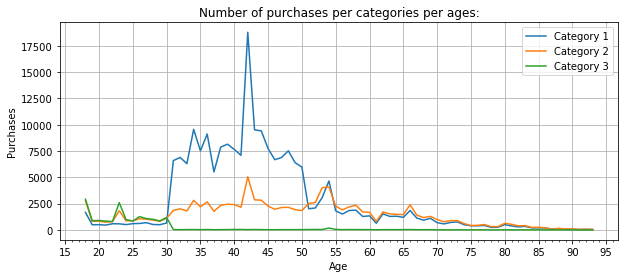

In [190]:
# plotting correlation between
# clients ages and purchased products category

# init
count2 = np.zeros((maxcateg - mincateg + 1, maxage - minage + 1))

# counting
for i in df_linked.index:
    # if neither age or categ is null, add 1 to the appropriate cell
    if (pd.notnull(df_linked.loc[i, "birth"]) and
        pd.notnull(df_linked.loc[i, "categ"])):
        age = (2022 - int(df_linked.loc[i, "birth"])) - minage
        categ = int(df_linked.loc[i, "categ"]) - mincateg
        count2[categ][age] += 1


# plot (I know there's only three categories so...)
X = np.arange(0, maxage - minage + 1, 1)
Y1 = count2[0][X]
Y2 = count2[1][X]
Y3 = count2[2][X]

fig, ax = plt.subplots()
  
ax.plot(X + minage, Y1, label = 'Category 1')  
ax.plot(X + minage, Y2, label = 'Category 2')  
ax.plot(X + minage, Y3, label = 'Category 3')
ax.grid()
ax.set_xlabel("Age")
ax.set_ylabel("Purchases")
ax.legend()

ax.set_xticks(np.arange(int(minage / 5) * 5,
                        (int(maxage / 5) + 1) * 5 + 1, 5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.title("Number of purchases per categories per ages:")

fig.set_figwidth(10) # this is for readability

fig.show()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_6444\116195611.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


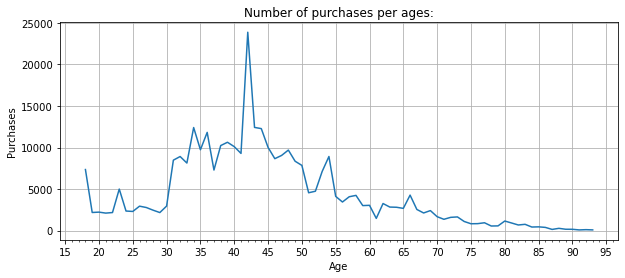

In [192]:
# plotting correlation between
# clients ages and number of purchases
# (and possibly shopping cart size)

# init
purchases = np.zeros(maxage - minage + 1)

# counting
for i in df_linked.index:
    # if age is not null, add 1 to the appropriate cell
    if pd.notnull(df_linked.loc[i, "birth"]):
        age = (2022 - int(df_linked.loc[i, "birth"])) - minage
        purchases[age] += 1


# plot
X = np.arange(0, maxage - minage + 1, 1)
Y = purchases[X]

fig, ax = plt.subplots()
  
ax.plot(X + minage, Y) 
ax.grid()
ax.set_xlabel("Age")
ax.set_ylabel("Purchases")

ax.set_xticks(np.arange(int(minage / 5) * 5,
                        (int(maxage / 5) + 1) * 5 + 1, 5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.title("Number of purchases per ages:")

fig.set_figwidth(10) # this is for readability

fig.show()